# Business Problem
Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts.
You are working as a data scientist with the analytics vertical of Scaler, focused on profiling the best companies and job positions to work for from the Scaler database. You are provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics.

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv')

In [3]:
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [4]:
df.shape

(205843, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153281 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [6]:
display(df.describe())

,Unnamed: 0,orgyear,ctc,ctc_updated_year
count,205843.000000,205757.000000,2.058430e+05,205843.000000
mean,103273.941786,2014.882750,2.271685e+06,2019.628231
std,59741.306484,63.571115,1.180091e+07,1.325104
min,0.000000,0.000000,2.000000e+00,2015.000000
25%,51518.500000,2013.000000,5.300000e+05,2019.000000
50%,103151.000000,2016.000000,9.500000e+05,2020.000000
75%,154992.500000,2018.000000,1.700000e+06,2021.000000
max,206922.000000,20165.000000,1.000150e+09,2021.000000


In [7]:
display(df.describe(include = 'object'))

,company_hash,email_hash,job_position
count,205799,205843,153281
unique,37299,153443,1017
top,nvnv wgzohrnvzwj otqcxwto,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Backend Engineer
freq,8337,10,43554


In [8]:
df.isnull().sum()

Unnamed: 0              0
company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52562
ctc_updated_year        0
dtype: int64

In [9]:
df.drop('Unnamed: 0',axis = 1,inplace=True)

### Insignts :
* Missing values are persent in data.
* columns like ctc has anomalies, for example the min value for ctc is '2' which is not right.
* There are 6 features with 205843 entires

# Data Visulization

In [10]:
def kde_boxplot(data, x, font_size, target=None):
    plt.figure(figsize = (20,7))
    
    plt.subplot(1,2,1)
    sns.kdeplot(data = data,
                x = x,
                hue = target
               )
    if target != None:
        plt.title(label = "Distribution of "+x+" for different "+target,
                 y = -0.2,
                 fontsize = font_size,
                 fontweight = 'bold')
    else:
        plt.title(label = "Distribution of "+x, 
                 y = -0.2,
                 fontsize = font_size,
                 fontweight = 'bold')
    plt.grid()
    
    plt.subplot(1,2,2)
    sns.boxplot(data=data,
               x = target,
               y = x)

    if target != None:
        plt.title(label = "Boxplot showing distribution of "+x+" for different "+target,
                 y = -0.2,
                 fontsize = font_size,
                 fontweight = 'bold')
        if df_grouped['City'].nunique() > 5:
            plt.xticks(rotation = 75)
    else:
        plt.title(label = "Boxplot showing distribution of "+x,
                 y = -0.2,
                 fontsize = font_size,
                 fontweight = 'bold')
    plt.grid(which='both')
    plt.show()

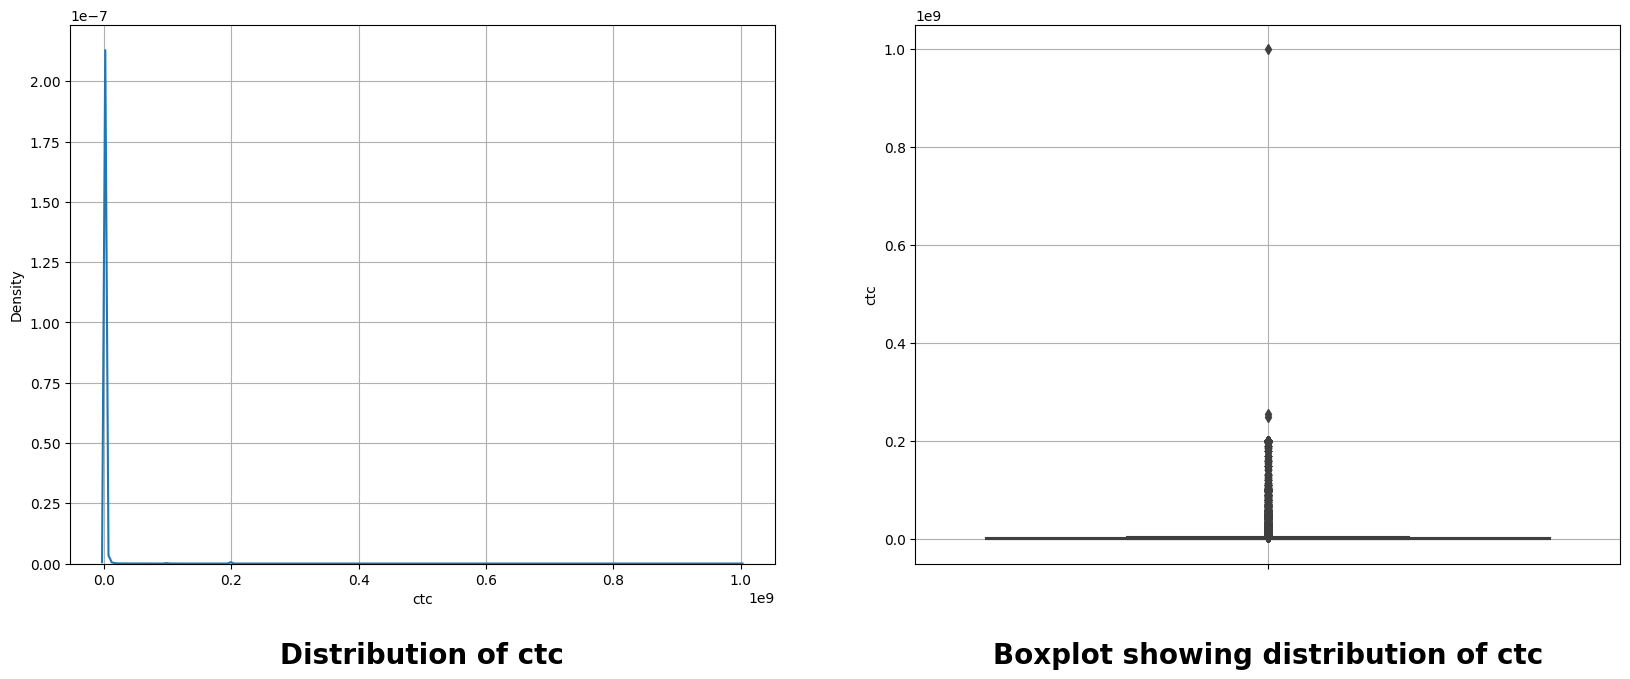

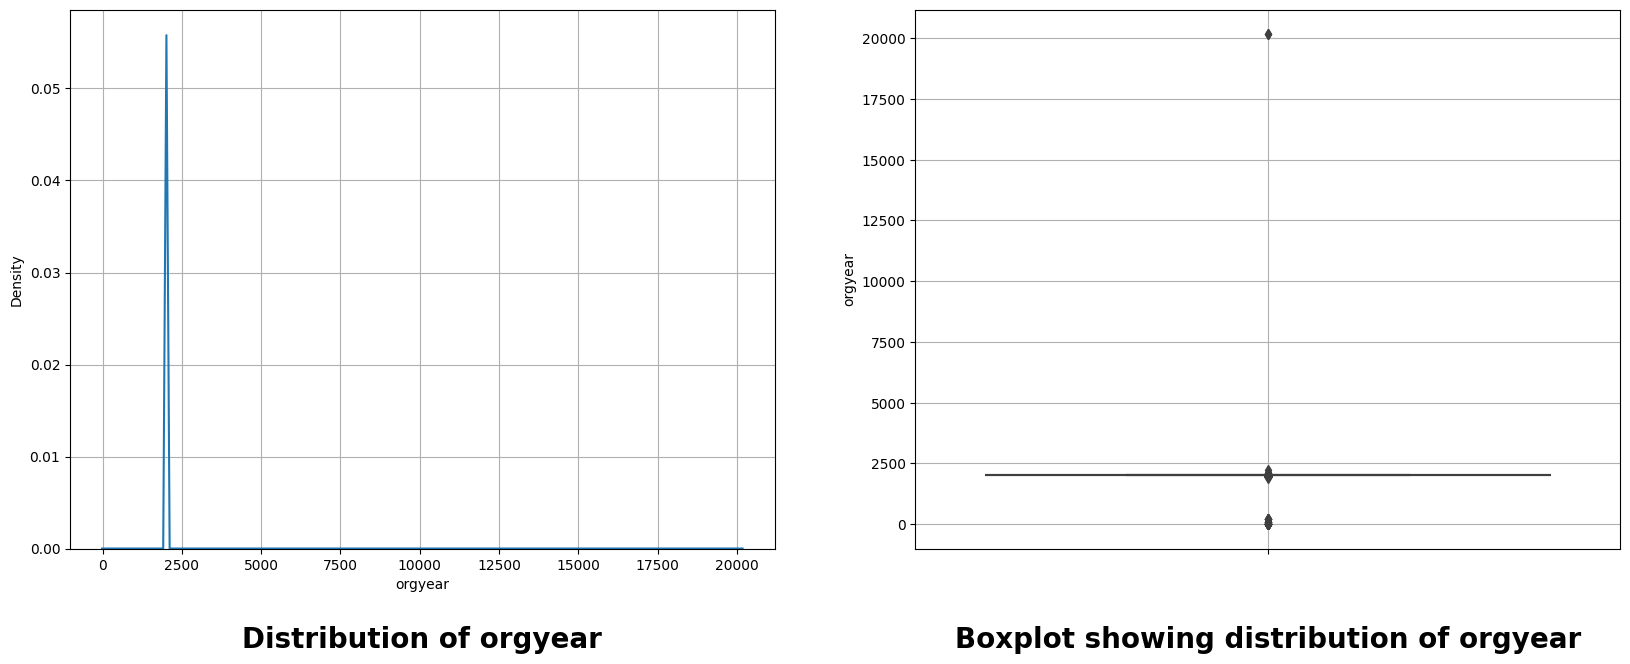

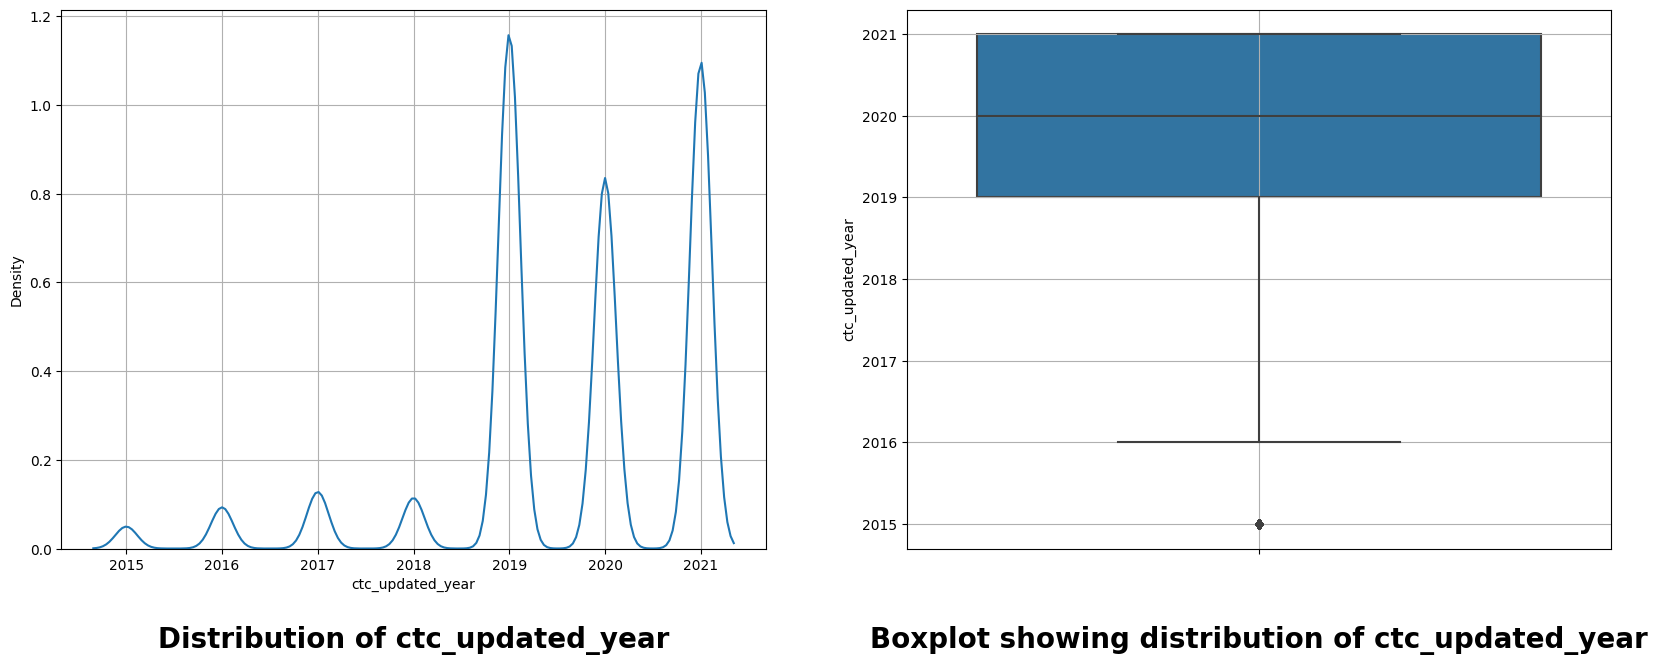

In [11]:
kde_boxplot(data=df, x = 'ctc', font_size = 20)
kde_boxplot(data=df, x = 'orgyear', font_size = 20)
kde_boxplot(data=df, x = 'ctc_updated_year', font_size = 20)

## Insights :
- CTC is highly skewed.
- Outliers or incorrect data is present in orgyear.

---

# Data Preprocessing

In [12]:
def missing_values(dataframe):
    feature = df.isnull().columns
    val = (df.isnull().sum().values/len(df) * 100).round(2)
    missing = pd.DataFrame(data = val, index = feature,columns= ['Percentage'])
    return missing

In [13]:
missing_values(df)

,Percentage
company_hash,0.02
email_hash,0.00
orgyear,0.04
ctc,0.00
job_position,25.53
ctc_updated_year,0.00


In [14]:
df = df.loc[df['ctc'] > 10000]

### KNN Imputation

In [15]:
from sklearn.impute import KNNImputer

In [16]:
imputer = KNNImputer(n_neighbors= 5)
df[['orgyear','ctc','ctc_updated_year']] = imputer.fit_transform(df[['orgyear','ctc','ctc_updated_year']])

In [17]:
df_non_missing = df[~(df.job_position.isnull())].copy()

In [18]:
x = df_non_missing.drop(['job_position','company_hash','email_hash'],axis = 1)
y = df_non_missing['job_position']

In [19]:
df['year_of_experience'] = df['ctc_updated_year'] - df['orgyear']

In [20]:
missing_values(df)

,Percentage
company_hash,0.02
email_hash,0.00
orgyear,0.00
ctc,0.00
job_position,25.56
ctc_updated_year,0.00
year_of_experience,0.00


In [21]:
from sklearn.neighbors import KNeighborsClassifier

# Imputation for job_position
knn = KNeighborsClassifier(n_neighbors=5)
df_imputed = df[~df['job_position'].isnull()][['orgyear','ctc','ctc_updated_year','job_position','year_of_experience']]

X = df_imputed.drop(columns=['job_position'],axis =1)
y = df_imputed['job_position']

knn.fit(X,y)

df_imputed = df.copy()

missing_indices = df[df['job_position'].isnull()].index

In [22]:
jobs_pos = knn.predict(df.loc[missing_indices, :].drop(['job_position','email_hash','company_hash'],axis=1))

In [23]:
df.loc[missing_indices,'job_position'] = jobs_pos

In [24]:
#Imputation for company hash
knn = KNeighborsClassifier(n_neighbors=5)
df_imputed = df[~df['company_hash'].isnull()][['orgyear','ctc','ctc_updated_year','company_hash','year_of_experience']]

X = df_imputed.drop(columns=['company_hash'],axis =1)
y = df_imputed['company_hash']

knn.fit(X,y)

df_imputed = df.copy()

missing_indices = df[df['company_hash'].isnull()].index

company = knn.predict(df.loc[missing_indices, :].drop(['company_hash','email_hash','job_position'],axis=1))

df.loc[missing_indices,'company_hash'] = company

In [25]:
missing_values(df)

,Percentage
company_hash,0.0
email_hash,0.0
orgyear,0.0
ctc,0.0
job_position,0.0
ctc_updated_year,0.0
year_of_experience,0.0


## Using Regex to clean categorical data

In [26]:
import re

def remove(x):
    return re.sub('[^A-Za-z0-9 ]+', '', x).lower().strip()

print(f'Job titles before preprocessing {df.job_position.nunique()}')
print(f'Company hash before preprocessing {df.company_hash.nunique()}')
print(f'Email hash before preprocessing {df.email_hash.nunique()}\n')

df.company_hash = df['company_hash'].apply(lambda x :remove(str(x)))
df.job_position =  df.job_position.apply(lambda x : remove(str(x)))
df.email_hash =  df.email_hash.apply(lambda x : remove(str(x)))

print(f'Job titles after preprocessing {df.job_position.nunique()}')
print(f'Company hash after preprocessing {df.company_hash.nunique()}')
print(f'Email hash after preprocessing {df.email_hash.nunique()}')

Job titles before preprocessing 1010
Company hash before preprocessing 37094
Email hash before preprocessing 152803

Job titles after preprocessing 893
Company hash after preprocessing 37094
Email hash after preprocessing 152803


In [27]:
df['ctc'].quantile(.99)

13000000.0

In [28]:
df.orgyear.quantile(0.009)

2000.0

- It feels unrealistic people earning above this value will contact scaler for learning, its a manual call so it might be incorrect.
- Also the orgyear was left skewed so at 1 percentile, 2000 is the year where people started working at hence this also becomes the threshold to eliminate skeweness

In [29]:
df[(df['orgyear'] < 2022 ) & (df['orgyear'] > df.orgyear.quantile(0.01))]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,year_of_experience
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000.0,other,2020.0,4.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999.0,fullstack engineer,2019.0,1.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000.0,backend engineer,2020.0,5.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000.0,backend engineer,2019.0,2.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000.0,fullstack engineer,2019.0,2.0
...,...,...,...,...,...,...,...
205838,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000.0,backend engineer,2019.0,11.0
205839,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000.0,fullstack engineer,2020.0,3.0
205840,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000.0,other,2021.0,0.0
205841,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000.0,backend engineer,2019.0,0.0


In [30]:
df = df.loc[(df['orgyear'] < 2022 ) & (df['orgyear'] > df.orgyear.quantile(0.01))]
df = df[df['ctc'] <= df['ctc'].quantile(.99)]

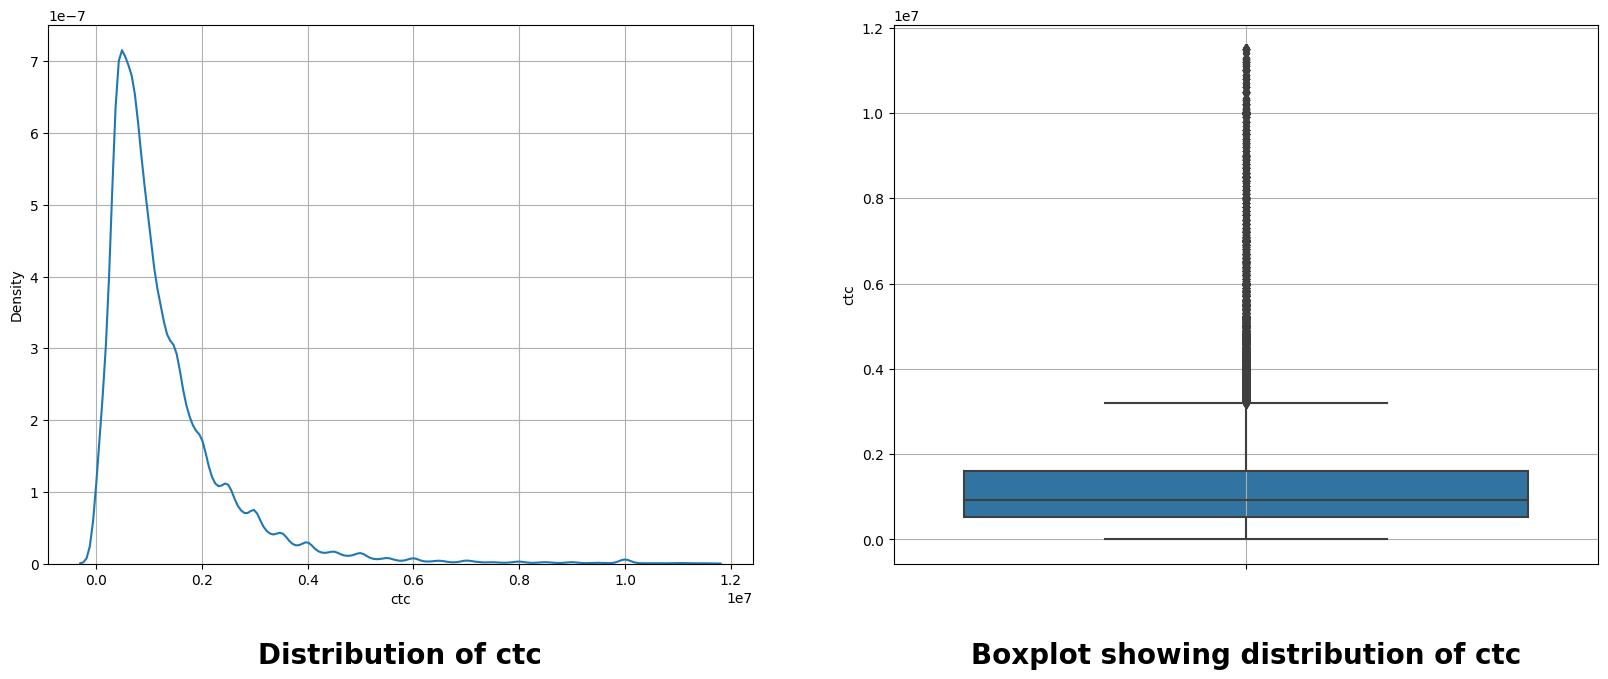

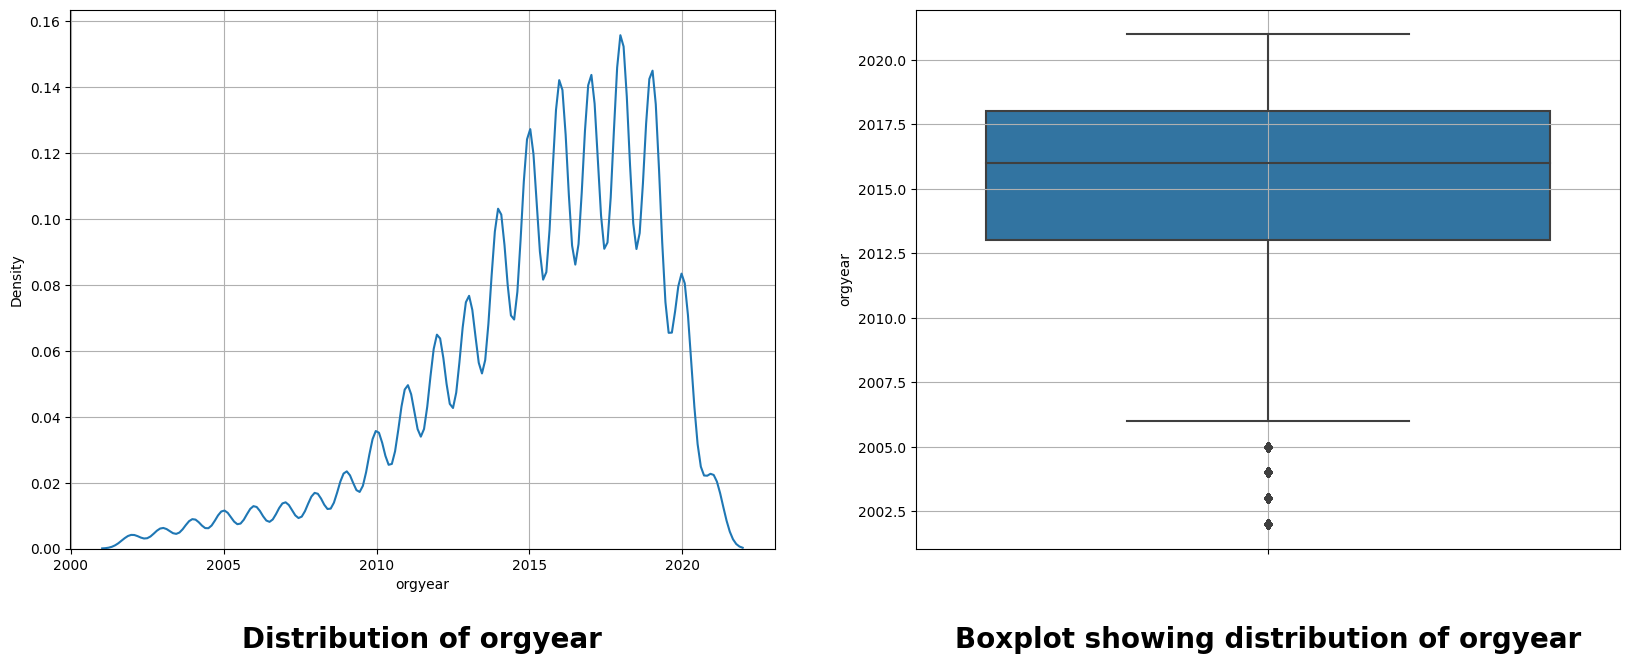

In [31]:
kde_boxplot(data=df, x = 'ctc', font_size = 20)
kde_boxplot(data=df, x = 'orgyear', font_size = 20)

## Insights 
* It was found that job_position column had 25% of the values missing which are imputed.
* Some other columns like company_hash and orgyear had small amount of missing values that are also fixed.
* Using regular expression data was preprocessed, so that there is no hinderence/difference with name of the company or job position.
* Some more preprocessing/anomally detection was done manually as well

---
# Manual Clustering

In [32]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [33]:
df_tier = df.groupby(['company_hash'])['ctc'].agg([percentile(50),percentile(75)]).reset_index().rename(columns = {'percentile_50':'percentile_50_tier', 'percentile_75':'percentile_75_tier'})
df_class = df.groupby(['company_hash','job_position'])['ctc'].agg([percentile(50),percentile(75)]).reset_index().rename(columns = {'percentile_50':'percentile_50_class', 'percentile_75':'percentile_75_class'})
df_designation = df.groupby(['company_hash','job_position','year_of_experience'])['ctc'].agg([percentile(50),percentile(75)]).reset_index().rename(columns = {'percentile_50':'percentile_50_designation', 'percentile_75':'percentile_75_designation'})

df_clean = pd.merge(left = df, right = df_tier, left_on = 'company_hash', right_on = 'company_hash', how='left')
df_clean = pd.merge(left = df_clean, right = df_class, left_on = ['company_hash','job_position'], right_on = ['company_hash','job_position'], how='left')
df_clean = df_clean.merge(on=['company_hash','job_position','year_of_experience'],how='left',right = df_designation)

In [34]:
df_clean['tier_label'] = df_clean[['ctc','percentile_50_tier','percentile_75_tier']].apply(lambda x : 1 if x.ctc >= x.percentile_75_tier else(2 if x.ctc >= x.percentile_50_tier else 3),axis=1)
df_clean['class_label'] = df_clean[['ctc','percentile_50_class','percentile_75_class']].apply(lambda x : 1 if x.ctc >= x.percentile_75_class else(2 if x.ctc >= x.percentile_50_class else 3),axis=1)
df_clean['designation_label'] = df_clean[['ctc','percentile_50_designation','percentile_75_designation']].apply(lambda x : 1 if x.ctc >= x.percentile_75_designation else(2 if x.ctc >= x.percentile_50_designation else 3),axis=1)

In [35]:
df_clean

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,year_of_experience,percentile_50_tier,percentile_75_tier,percentile_50_class,percentile_75_class,percentile_50_designation,percentile_75_designation,tier_label,class_label,designation_label
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000.0,other,2020.0,4.0,1070000.0,1500000.00,1085000.0,1092500.0,1085000.0,1092500.0,2,1,1
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999.0,fullstack engineer,2019.0,1.0,900000.0,1620000.00,775000.0,1275000.0,470000.0,725000.0,3,3,3
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000.0,backend engineer,2020.0,5.0,2000000.0,2000000.00,2000000.0,2000000.0,2000000.0,2000000.0,1,1,1
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000.0,backend engineer,2019.0,2.0,1400000.0,2000000.00,1600000.0,1900000.0,1375000.0,1712500.0,3,3,3
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000.0,fullstack engineer,2019.0,2.0,850000.0,1300000.00,600000.0,1000000.0,1000000.0,1200000.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198975,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000.0,backend engineer,2019.0,11.0,2300000.0,2700000.00,2275000.0,2475000.0,220000.0,220000.0,3,3,1
198976,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000.0,fullstack engineer,2020.0,3.0,1200000.0,1784999.75,800000.0,1075000.0,500000.0,500000.0,3,3,1
198977,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000.0,other,2021.0,0.0,1300000.0,1500000.00,1200000.0,1500000.0,500000.0,600000.0,3,3,1
198978,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000.0,backend engineer,2019.0,0.0,712000.0,1375000.00,900000.0,1500000.0,995000.0,1400000.0,1,1,1


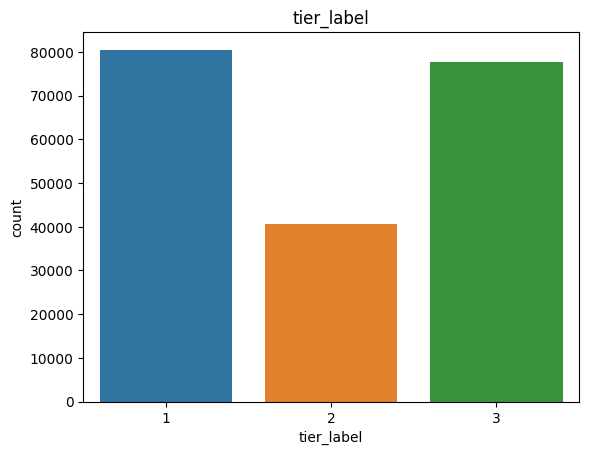

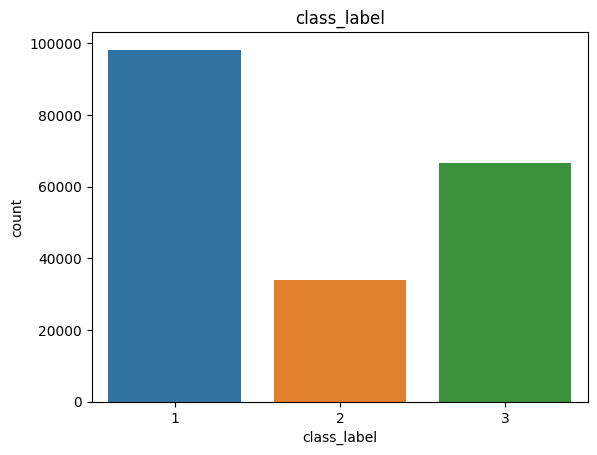

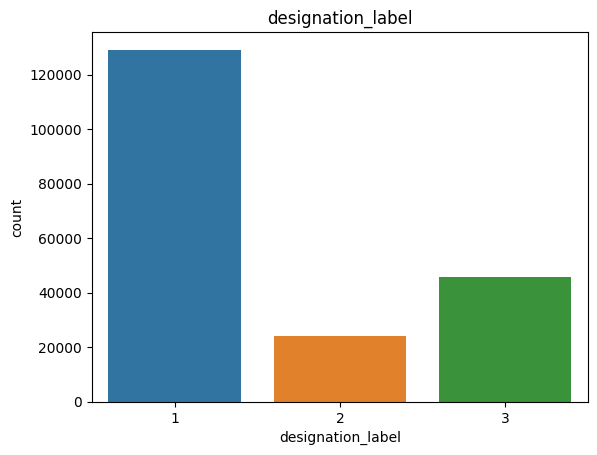

In [36]:
cols = ['tier_label', 'class_label', 'designation_label']
for col in cols:
    sns.countplot(data=df_clean, x = col)
    plt.title(col)
    plt.show()


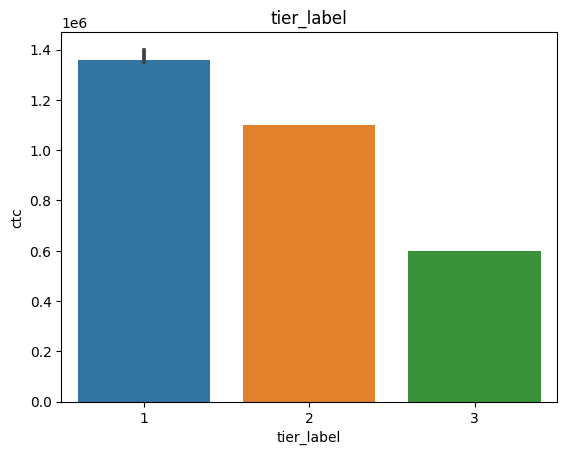

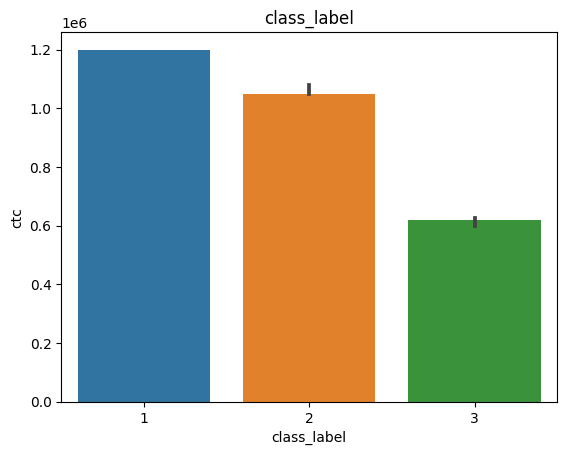

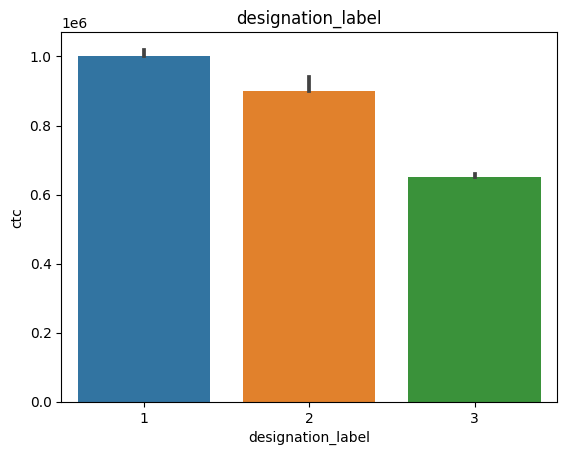

In [37]:
cols = ['tier_label', 'class_label', 'designation_label']
for col in cols:
    sns.barplot(data=df_clean, x = col,y = 'ctc',estimator='median')
    plt.title(col)
    plt.show()

C:\Users\yasee\AppData\Local\Temp\ipykernel_4324\2341416455.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_clean.corr(),annot=True)


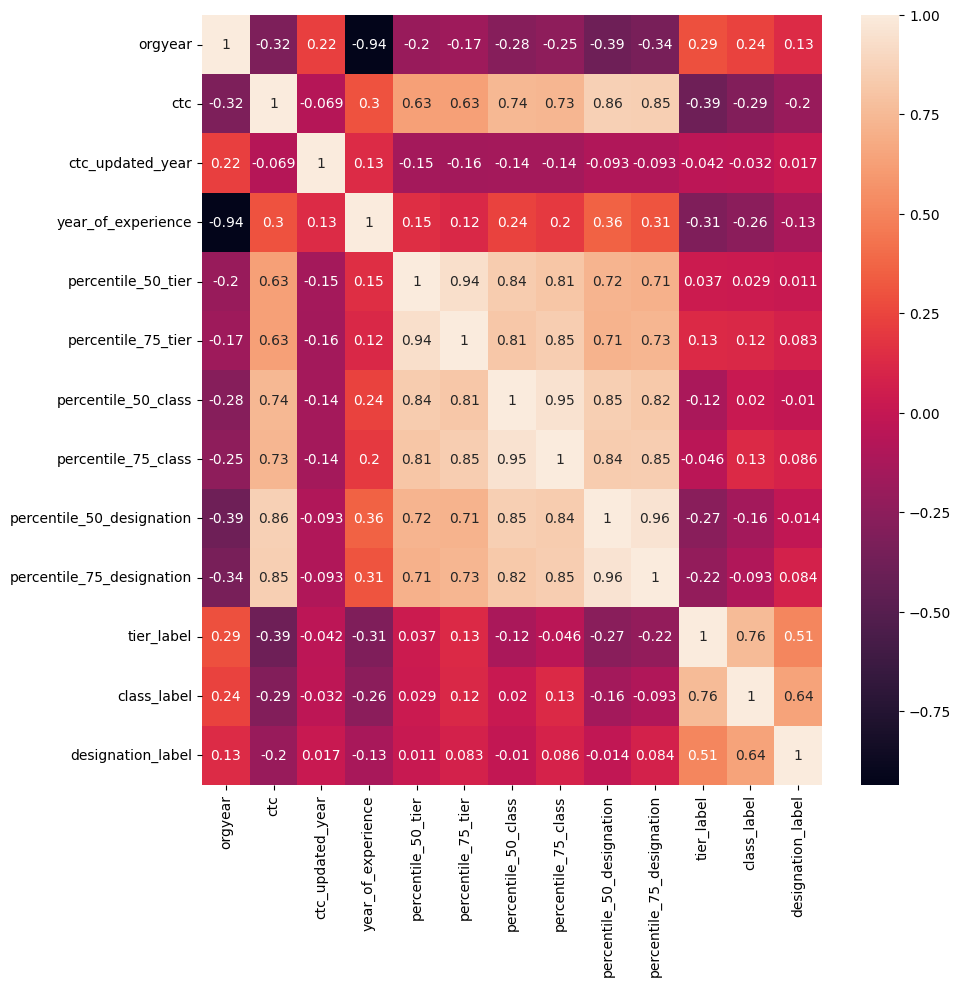

In [39]:
plt.figure(figsize = (10,10))
sns.heatmap(df_clean.corr(),annot=True)
plt.show()

# Insights 
* Different entries were assigned tiers on the basis of company, job, years of experience etc.
* Tier 1 are the employees that earn more than 75 percentile in their respective company or job or year of experince or in some case multiple things combined.
* The lowest tier is tier 3 which are our main audiance.

# Encoding

In [40]:
df_company_label = df_clean.groupby('company_hash')['ctc'].agg(['median']).sort_values(by='median').reset_index().reset_index().rename(columns = {'index':'company_encode'}).drop('median',axis=1)
df_jobpos_label = df_clean.groupby('job_position')['ctc'].agg(['median']).sort_values(by='median').reset_index().reset_index().rename(columns = {'index':'jobpos_encode'}).drop('median',axis=1)

In [41]:
df_clean = df_clean.merge(df_company_label,on='company_hash',how='left')
df_clean = df_clean.merge(df_jobpos_label,on='job_position',how='left')

In [42]:
df_clean.rename(columns= {'company_encode_x':'company_encode','jobpos_encode_x':'job_encode'},inplace=True)

In [43]:
df_clean

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,year_of_experience,percentile_50_tier,percentile_75_tier,percentile_50_class,percentile_75_class,percentile_50_designation,percentile_75_designation,tier_label,class_label,designation_label,company_encode,jobpos_encode
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000.0,other,2020.0,4.0,1070000.0,1500000.00,1085000.0,1092500.0,1085000.0,1092500.0,2,1,1,23656,305
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999.0,fullstack engineer,2019.0,1.0,900000.0,1620000.00,775000.0,1275000.0,470000.0,725000.0,3,3,3,20805,455
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000.0,backend engineer,2020.0,5.0,2000000.0,2000000.00,2000000.0,2000000.0,2000000.0,2000000.0,1,1,1,31697,528
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000.0,backend engineer,2019.0,2.0,1400000.0,2000000.00,1600000.0,1900000.0,1375000.0,1712500.0,3,3,3,27782,528
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000.0,fullstack engineer,2019.0,2.0,850000.0,1300000.00,600000.0,1000000.0,1000000.0,1200000.0,1,1,1,19669,455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198975,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000.0,backend engineer,2019.0,11.0,2300000.0,2700000.00,2275000.0,2475000.0,220000.0,220000.0,3,3,1,32560,528
198976,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000.0,fullstack engineer,2020.0,3.0,1200000.0,1784999.75,800000.0,1075000.0,500000.0,500000.0,3,3,1,24953,455
198977,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000.0,other,2021.0,0.0,1300000.0,1500000.00,1200000.0,1500000.0,500000.0,600000.0,3,3,1,26598,305
198978,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000.0,backend engineer,2019.0,0.0,712000.0,1375000.00,900000.0,1500000.0,995000.0,1400000.0,1,1,1,16295,528


## Insights 
* One major problem was there were a lot of unique companies as well as job positions, so encoding like one-hot encoding can't be used in this case and hence a different approch was used.
* The method used above involved label encoding but the labels assigned are not random but rather given with respecitve to the median or avg income of that category.

---

In [44]:
df_wth_label = df_clean.drop(['company_hash','email_hash','job_position','orgyear','ctc_updated_year'],axis=1)

In [45]:
df_final = df_wth_label.drop(['tier_label','class_label','designation_label'],axis=1).copy()

# Standardization

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
ss =  StandardScaler()
std_val = ss.fit_transform(df_final)

# KMeans Clustring

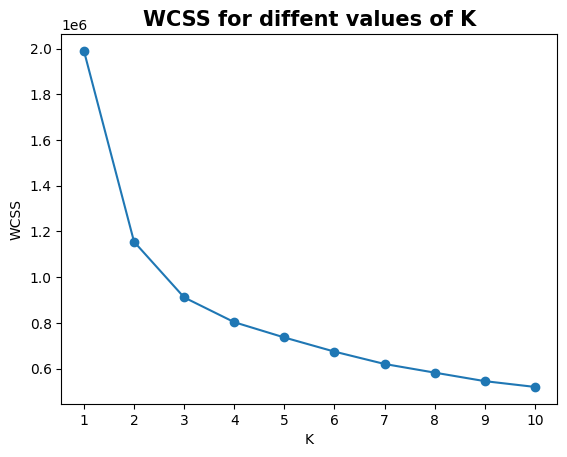

In [48]:
from sklearn.cluster import KMeans

wcss = list()
K = 10

for k in range(1,K+1):
    cluster = KMeans(n_clusters=k).fit(std_val)
    wcss.append([k,cluster.inertia_])
    
wcss = np.array(wcss)

plt.plot(wcss[:,0],wcss[:,1],marker = 'o')
plt.title('WCSS for diffent values of K',fontsize = 15,fontweight = 'bold')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.xticks(range(1,k+1))
plt.show()

In [49]:
cluster = KMeans(n_clusters=3).fit(std_val)

In [50]:
df_final

,ctc,year_of_experience,percentile_50_tier,percentile_75_tier,percentile_50_class,percentile_75_class,percentile_50_designation,percentile_75_designation,company_encode,jobpos_encode
0,1100000.0,4.0,1070000.0,1500000.00,1085000.0,1092500.0,1085000.0,1092500.0,23656,305
1,449999.0,1.0,900000.0,1620000.00,775000.0,1275000.0,470000.0,725000.0,20805,455
2,2000000.0,5.0,2000000.0,2000000.00,2000000.0,2000000.0,2000000.0,2000000.0,31697,528
3,700000.0,2.0,1400000.0,2000000.00,1600000.0,1900000.0,1375000.0,1712500.0,27782,528
4,1400000.0,2.0,850000.0,1300000.00,600000.0,1000000.0,1000000.0,1200000.0,19669,455
...,...,...,...,...,...,...,...,...,...,...
198975,220000.0,11.0,2300000.0,2700000.00,2275000.0,2475000.0,220000.0,220000.0,32560,528
198976,500000.0,3.0,1200000.0,1784999.75,800000.0,1075000.0,500000.0,500000.0,24953,455
198977,700000.0,0.0,1300000.0,1500000.00,1200000.0,1500000.0,500000.0,600000.0,26598,305
198978,5100000.0,0.0,712000.0,1375000.00,900000.0,1500000.0,995000.0,1400000.0,16295,528


In [51]:
cluster_centers = pd.DataFrame(data = ss.inverse_transform(cluster.cluster_centers_),columns = df_final.columns,index = ['tier_3','tier_2','tier_1'])
# cluster_centers = cluster_centers.sort_index()

In [52]:
cluster_centers

,ctc,year_of_experience,percentile_50_tier,percentile_75_tier,percentile_50_class,percentile_75_class,percentile_50_designation,percentile_75_designation,company_encode,jobpos_encode
tier_3,6.411221e+05,3.410480,6.228865e+05,8.712109e+05,6.031256e+05,7.835583e+05,6.069630e+05,7.079378e+05,13380.610268,430.717356
tier_2,1.454540e+06,4.899511,1.378678e+06,1.870073e+06,1.376389e+06,1.728229e+06,1.409821e+06,1.584966e+06,26396.827762,488.005396
tier_1,3.296098e+06,6.281033,2.358049e+06,3.157839e+06,2.828552e+06,3.508445e+06,3.171336e+06,3.606142e+06,31562.080986,547.186076


In [53]:
df_final['labels'] = cluster.labels_

In [54]:
df_final

,ctc,year_of_experience,percentile_50_tier,percentile_75_tier,percentile_50_class,percentile_75_class,percentile_50_designation,percentile_75_designation,company_encode,jobpos_encode,labels
0,1100000.0,4.0,1070000.0,1500000.00,1085000.0,1092500.0,1085000.0,1092500.0,23656,305,1
1,449999.0,1.0,900000.0,1620000.00,775000.0,1275000.0,470000.0,725000.0,20805,455,0
2,2000000.0,5.0,2000000.0,2000000.00,2000000.0,2000000.0,2000000.0,2000000.0,31697,528,1
3,700000.0,2.0,1400000.0,2000000.00,1600000.0,1900000.0,1375000.0,1712500.0,27782,528,1
4,1400000.0,2.0,850000.0,1300000.00,600000.0,1000000.0,1000000.0,1200000.0,19669,455,0
...,...,...,...,...,...,...,...,...,...,...,...
198975,220000.0,11.0,2300000.0,2700000.00,2275000.0,2475000.0,220000.0,220000.0,32560,528,1
198976,500000.0,3.0,1200000.0,1784999.75,800000.0,1075000.0,500000.0,500000.0,24953,455,0
198977,700000.0,0.0,1300000.0,1500000.00,1200000.0,1500000.0,500000.0,600000.0,26598,305,0
198978,5100000.0,0.0,712000.0,1375000.00,900000.0,1500000.0,995000.0,1400000.0,16295,528,1


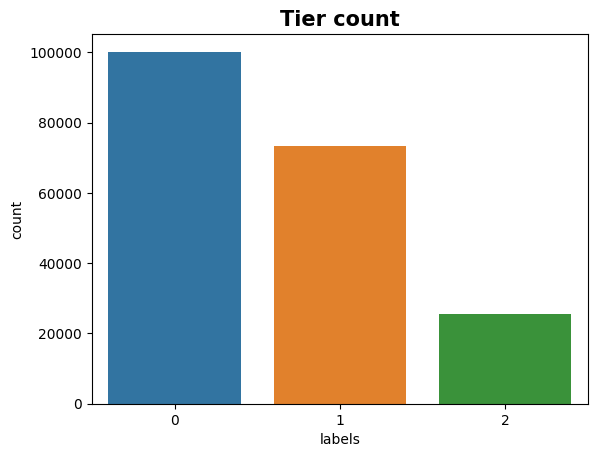

In [55]:
sns.countplot(data = df_final, x = 'labels')
plt.title('Tier count',fontsize = 15,fontweight = 'bold')
plt.show()

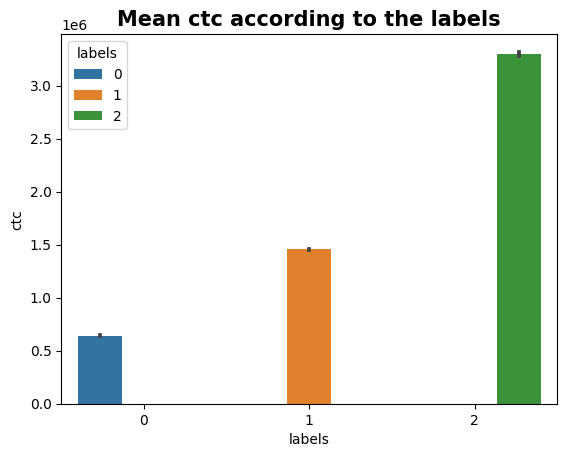

In [56]:
sns.barplot(x = 'labels',y='ctc',data=df_final,hue='labels',estimator='mean')
plt.title('Mean ctc according to the labels',fontsize = 15,fontweight = 'bold')
plt.show()

In [57]:
df_final['labels'] = df_final['labels'].map({1:'Tier 1',0 :'Tier 2',2:'Tier 3'})

In [58]:
df_final

,ctc,year_of_experience,percentile_50_tier,percentile_75_tier,percentile_50_class,percentile_75_class,percentile_50_designation,percentile_75_designation,company_encode,jobpos_encode,labels
0,1100000.0,4.0,1070000.0,1500000.00,1085000.0,1092500.0,1085000.0,1092500.0,23656,305,Tier 1
1,449999.0,1.0,900000.0,1620000.00,775000.0,1275000.0,470000.0,725000.0,20805,455,Tier 2
2,2000000.0,5.0,2000000.0,2000000.00,2000000.0,2000000.0,2000000.0,2000000.0,31697,528,Tier 1
3,700000.0,2.0,1400000.0,2000000.00,1600000.0,1900000.0,1375000.0,1712500.0,27782,528,Tier 1
4,1400000.0,2.0,850000.0,1300000.00,600000.0,1000000.0,1000000.0,1200000.0,19669,455,Tier 2
...,...,...,...,...,...,...,...,...,...,...,...
198975,220000.0,11.0,2300000.0,2700000.00,2275000.0,2475000.0,220000.0,220000.0,32560,528,Tier 1
198976,500000.0,3.0,1200000.0,1784999.75,800000.0,1075000.0,500000.0,500000.0,24953,455,Tier 2
198977,700000.0,0.0,1300000.0,1500000.00,1200000.0,1500000.0,500000.0,600000.0,26598,305,Tier 2
198978,5100000.0,0.0,712000.0,1375000.00,900000.0,1500000.0,995000.0,1400000.0,16295,528,Tier 1


## Insights 
* From WCSS vs k plot it can be observed that amount of cluster are either 2 or 3.
* After clustring with 3 clusters it is found out that for tier 1 cluster the ctc is 32 lakh, followed by tier2 with ctc of 14 lakh and at last tier 3 with ctc of 6.5 lakh.
* These clusters makes sense if we consider what a mass recruiter, a decent company and some product base tier one companies offers.
* Some other aspects to validate these cluster is also the fact that the experience of tier 1 category prople is the highest at 6.2 years followed by tier 2 with the experience of 4.8 years and 3.4 years for tier 3.
* Unlike manual clustring there indeed a gap between number of tier 1, 2 and 3 people when k means is used.
* As expected number of tier 1 joiners are the least followed by tier 2 and tier 3 which shows that people with highest income are the least.

---

# Herarichal Clustring

In [59]:
df_her = df_wth_label.drop(['tier_label','class_label','designation_label'],axis=1).copy()

In [60]:
df_samples = df_her.sample(10000)

In [61]:
from sklearn.cluster import AgglomerativeClustering

In [62]:
cluster = AgglomerativeClustering(n_clusters=3)

In [63]:
cluster.fit(df_samples)

AgglomerativeClustering(n_clusters=3)

In [64]:
df_samples['labels'] = cluster.labels_

In [65]:
df_samples

,ctc,year_of_experience,percentile_50_tier,percentile_75_tier,percentile_50_class,percentile_75_class,percentile_50_designation,percentile_75_designation,company_encode,jobpos_encode,labels
180246,24000.0,0.0,24000.0,24000.0,24000.0,24000.0,24000.0,24000.0,189,305,2
98664,1260000.0,8.0,1260000.0,1260000.0,1260000.0,1260000.0,1260000.0,1260000.0,26302,528,1
13040,1020000.0,4.0,1200000.0,1230000.0,1020000.0,1020000.0,1020000.0,1020000.0,25454,461,1
151715,3500000.0,-3.0,3000000.0,3250000.0,3500000.0,3500000.0,3500000.0,3500000.0,34110,242,0
47937,2400000.0,12.0,1537000.0,2330000.0,2000000.0,2400000.0,2400000.0,2400000.0,29022,528,0
...,...,...,...,...,...,...,...,...,...,...,...
75790,200000.0,3.0,2000000.0,2950000.0,1660000.0,2800000.0,1250000.0,1775000.0,31566,455,1
81671,1950000.0,-1.0,1300000.0,1950000.0,1300000.0,1980000.0,1058500.0,2025000.0,26569,528,1
162627,1300000.0,2.0,1300000.0,1300000.0,1300000.0,1300000.0,1300000.0,1300000.0,26546,535,1
4982,2000000.0,3.0,2550000.0,3437500.0,2680000.0,3500000.0,2590000.0,3000000.0,33278,528,0


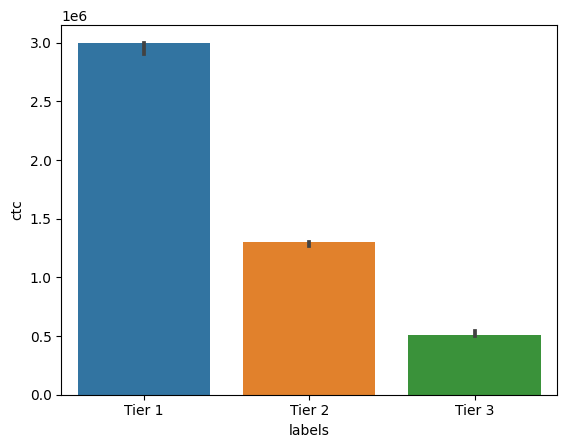

In [66]:
sns.barplot(x = 'labels',y='ctc',data=df_samples,estimator=np.median)
plt.xticks(ticks=[0,1,2],labels= ['Tier 1','Tier 2','Tier 3'])
plt.show()

Text(0, 0.5, 'distance')

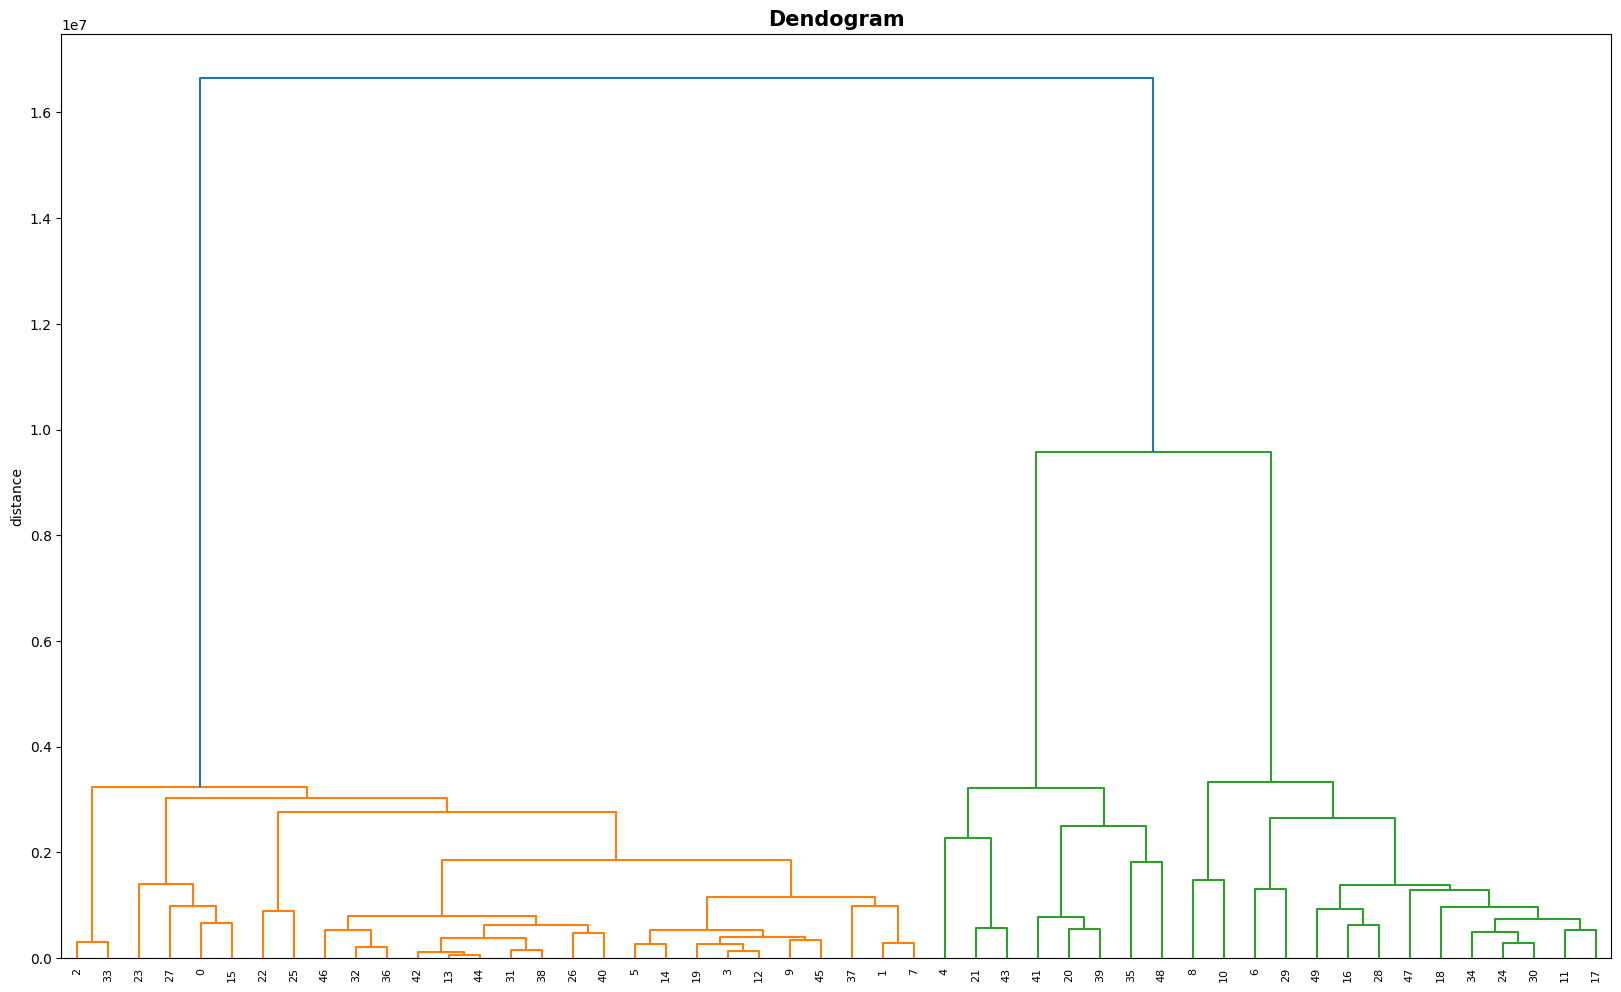

In [67]:
df_her = df_wth_label.drop(['tier_label','class_label','designation_label'],axis=1)
index = pd.Index(df_her['jobpos_encode'].values)
df_her = df_her.set_index(index)
df_her.drop('jobpos_encode',inplace=True,axis=1)

import scipy.cluster.hierarchy as sch

fig, ax = plt.subplots(figsize=(20, 12))
dend = sch.dendrogram(sch.linkage(df_her.sample(50), method='ward'))
plt.title('Dendogram',fontweight='bold',fontsize=15)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

In [68]:
df_samples['labels'] = df_samples['labels'].map({0:'Tier 1',2:'Tier 2', 1:'Tier 3'})

## Insights
* When observing herarichal clustring, we can see that it also produces 3 clusters in general.
* This helps to validate our assumptions of 3 cluster which we used in kmeans.
* When noticing the average salary we can clearly see the paygap between tier1, tier2 and tier 3 is very noticable.

# Recommendations 
* We found out that there are three categories of people, one belong to the elite category which earns nearly 32LPA followed by other categories below. 
* Our main audiance should be people exluding the above category as they might lack the skillset required to have such high salary.
* For a BD or any person in general trying to look at the results, one recommendation to see check wheather one's company and skill set can  be improved or not appart from their tier which is decided mostly based on income.
* Further fine tuning can also be done to above results(manual clustering mainly) so that we can filter the  target our required category of people.
* For manual cluster, any one with all tier 1 category in class, tier and designation can't be upskilled so appart from these cateogory we can include everyone else.